In [11]:
library(datasets)
install.packages("tree")
library(tree) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Splitting into test and train data sets. 

In [12]:
smp_size <- 0.67*nrow(iris)

train_ind <- sample(nrow(iris), size=smp_size)

#Getting a random sample of indicies for training and testing data
train <- iris[train_ind,]
test <- iris[-train_ind,]

In [13]:
clf_tree <- tree(formula = Species~ ., data=iris, subset=train_ind, wts=TRUE) # Creating the Desicion tree model

clf_pred <- predict(clf_tree, train, type="class") # Training the model

In [14]:
accuracy <- function(actual, predicted) {
  mean(actual == predicted)
}

accuracy(clf_pred, train$Species) # Accuracy of the model

[1] 0.97

In [15]:
with(train, table(clf_pred, train$Species))

            
clf_pred     setosa versicolor virginica
  setosa         36          0         0
  versicolor      0         31         0
  virginica       0          3        30

In [16]:
# normalize the confusion matrix
normalizeCM <- function(cm){
        cm_norm <- cm
        for ( i in 1:3){
                for ( j in 1:3){
                        cm_norm[i,j] <- cm[i,j]/sum(cm[i,])
                }
        }
        
        return(round(cm_norm, 2))
}
with(train, table(clf_pred, train$Species))
# call upon the normalizeCM function and print out the normalized matrix
normalizeCM(with(train, table(clf_pred, train$Species)))

            
clf_pred     setosa versicolor virginica
  setosa         36          0         0
  versicolor      0         31         0
  virginica       0          3        30

            
clf_pred     setosa versicolor virginica
  setosa       1.00       0.00      0.00
  versicolor   0.00       1.00      0.00
  virginica    0.00       0.09      0.91

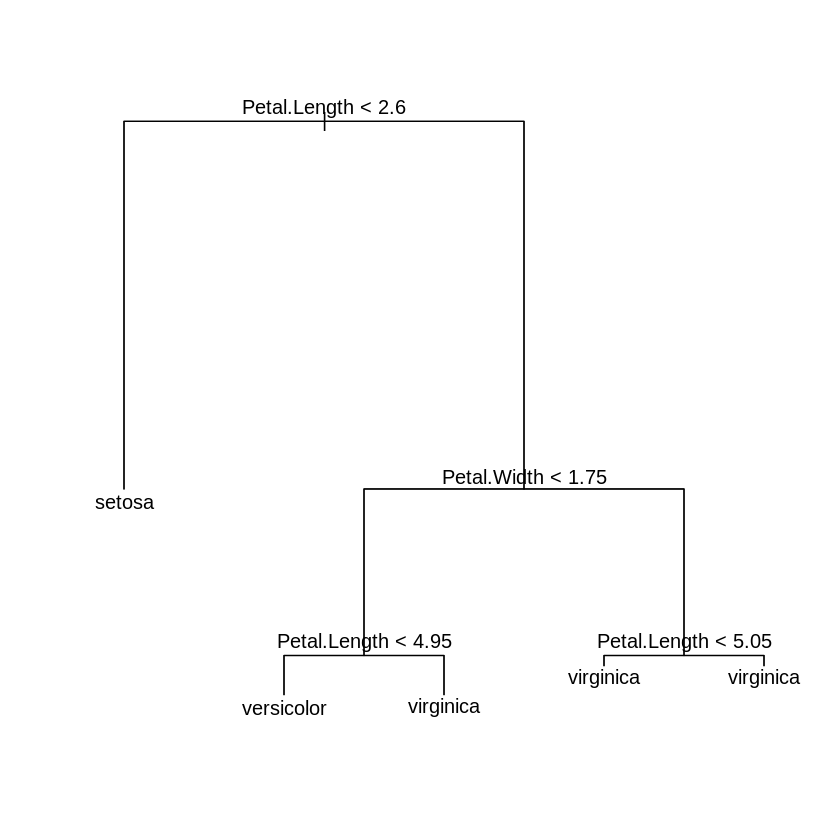

In [17]:
plot(clf_tree)
text(clf_tree)



In [18]:
## Testing the Decision Tree with user inputted values
# The below function inputValue asks the user to enter a numeric value for a certain feature
inputValue <- function(feature_name){
  # creates message to prompt user to input the respective value
  message <- paste("Enter ", feature_name, ": ")
  while(TRUE){
    # If below zero or above 10, prints out error message, and prompts the user once more 
    # to input a value for the respective feature
    value = as.double(readline(prompt = message))
    if(value<0 | value>10){
      warning("Invalid entry, please try again")
    } else {
      # returns the measurement as a double
      return(value)
    }
  } 
}

In [19]:
# Create a species level vector :
species_levels <- levels(factor(iris$Species))

## Function to predict species 
predictSpecies <- function(measurements){
        #Create a data frame with given input values
        predict_features <- data.frame('Sepal.Length'= measurements[1], 'Sepal.Width'= measurements[2],
                                       'Petal.Length'= measurements[3], 'Petal.Width'= measurements[4])
        # probabilities for the 3 possible outcomes 
        prediction <- predict(clf_tree, predict_features, type='class')
        # Change prediction from numeric to character using species_levels
        prediction <- species_levels[prediction]
        # Inform user of calculated prediction
        cat("That flower is most likely: ", prediction)
}

In [25]:
.2# Call upon the inputValue function four times to obtain the four input values
print('Measurements need to be numeric values between 0 and 10')
sepal_length <-  inputValue('Sepal Length')
sepal_width <-  inputValue('Sepal Width')
petal_length <- inputValue('Petal Length')
petal_width <- inputValue('Petal Width')

# create a list with four given measurements
features = c(sepal_length, sepal_width, petal_length, petal_width)

# Call upon the predictSpecies function 
predictSpecies(features)

[1] "Measurements need to be numeric values between 0 and 10"
Enter  Sepal Length : 5.1
Enter  Sepal Width : 3.4
Enter  Petal Length : 1.4
Enter  Petal Width : 0.2
That flower is most likely:  setosa